In [1]:
"""By Kutay/Berkay DÖNMEZ"""

#should get bs4, html5lib, lxml packages first
import scipy.constants as sc
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
from dask.distributed import Client
import matplotlib.pyplot as plt
from metpy.plots import  SkewT
from metpy.units import units
from scipy.ndimage import gaussian_filter
import cartopy
import metpy.calc as mpcalc
from scipy.ndimage.filters import minimum_filter, maximum_filter
import numpy as np
import matplotlib.colors as colors
from datetime import datetime
import matplotlib.patheffects as PathEffects
import cdsapi
import proplot as plot
import os
import cartopy.crs as ccrs
import asyncio
from dask.distributed import Client, LocalCluster, fire_and_forget
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER , LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
# import own packages
sys.path.append(r'..\src')
import Compact_Maps
from OpenThermodynamicData import opendownloadeddata
from Hodograph import hodograph
from Skewt import skewt
from Precipitation_Compact_Maps import Compact_precipitation

In [2]:
DateList = np.load('DateList_Precipitation_10042021.npy', allow_pickle=True)

In [3]:
DateList

array([['20100805', '2011March09', 1],
       ['20120628', '2015July17', 1],
       ['20191201', '2018January01', 1],
       ...,
       ['20150312', '2015August25', 1],
       ['20130514', '2011September30', 1],
       ['20160107', '2011November03', 1]], dtype=object)

In [7]:
# Define the path
#storm klasörüne geçiş yap
for count in range(len(DateList)):
    
    print('THE DATES IS: ', str(DateList[count, 0]))
    # If the date has already processed, than continue to next loop. first cond
    # If the plot already done continue to next loop. second cond
    if DateList[count, 2] == 1: continue
        
    dates = str(DateList[count, 0])
    year = int(dates[:4])
    month = int(dates[4:6])
    day = int(dates[6:])

    datetime_object = datetime(year, month, day)

    pre_data_path = r'C:\Users\USER\JupyterLab\Climaturk_Site\Docs\STORM_DATA\precipitation'
    full_path_era5 = pre_data_path + '\\' + 'DAILY_ERA5' + '\\' + 'DAILY_ERA5.nc'
    full_path_merra2 = pre_data_path + '\\' + 'DAILY_MERRA2' + '\\' + 'DAILY_MERRA2.nc'
    full_path_jra55 = pre_data_path + '\\' + 'DAILY_JRA55' + '\\' + 'DAILY_JRA55.nc'
    full_path_cfsr_cfsv2 = pre_data_path + '\\' + 'DAILY_CFSR_CFSV2' + '\\' + 'DAILY_CFSR_CFSV2.nc'
    
    #storm için yeni data klasörü oluştur
    os.chdir(r'C:\Users\USER\JupyterLab\Climaturk_Site\Docs\STORMS\precipitation')
    try:
        os.mkdir('{}'.format(str(DateList[count, 0])))
    except:
        print('Directory exists')
    
    # clip datasets into datelist
    # [25, 46, 34, 44]
    dt_era5 = xr.open_dataset(full_path_era5).sel(time = datetime_object,)['tp'] * 1000 #m - saatlik = 1000 ile çarp
    dt_merra2 = xr.open_dataset(full_path_merra2).sel(time = datetime_object,)['PRECTOTCORR'] * 3600 # kg/m2s-1 - saatlik = 3600 ile çarp günlük toplamı
    dt_jra55 = xr.open_dataset(full_path_jra55).sel(initial_time0_hours = datetime_object,)['TPRAT_GDS4_SFC_ave3h'] * 2 / 4 # mm/day - 6 hourly - 3hour forecast = 2 ile çarp (kalan 12 saat) ve 4 'e böl(mm/dayden mm/6hour'a)
    dt_cfsr_cfsv2 = xr.open_dataset(full_path_cfsr_cfsv2).sel(time = datetime_object,)['A_PCP_L1_Accum_1'] * 6 # kg/m2 - 6hourly - 1 hour accumulation = 6 ile çarp
    
    # rename dimensions
    dt_merra2 = dt_merra2.rename({'lat':'latitude', 'lon':'longitude'})
    dt_jra55 = dt_jra55.rename({'g4_lat_1':'latitude', 'g4_lon_2':'longitude', 'initial_time0_hours':'time'})
    dt_cfsr_cfsv2 = dt_cfsr_cfsv2.rename({'lat':'latitude', 'lon':'longitude'})
    
    
    # Burada artık görselleştirme kodu giriyor devreye
    Compact_precipitation(dt_era5, 'era5', str(DateList[count, 0]))
    Compact_precipitation(dt_merra2, 'merra2', str(DateList[count, 0]))
    Compact_precipitation(dt_jra55, 'jra55', str(DateList[count, 0]))
    Compact_precipitation(dt_cfsr_cfsv2, 'cfsr_cfsv2', str(DateList[count, 0]))
    
    # ...
    
    # change 0 to 1 in corresponding plot's [done] column (means the plot is completed in plotting)
    DateList[count, 2] = 1
    np.save('DateList_Precipitation_10042021', DateList)
    print('Plot Done: \n\n', str(DateList[count, 0]))
    
    break

THE DATES IS:  20100805
Directory exists


C:\Users\USER\anaconda3\envs\env_14052021\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\USER\JupyterLab\Climaturk_Site\GITHUB\version_17_05_2021\Climaturk-Base\development\Precipitation_Compact_Maps.py:167: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig(r'C:\Users\USER\JupyterLab\Climaturk_Site\Docs\STORMS\precipitation\{}\{}.jpeg'.format(dates, source),
C:\Users\USER\JupyterLab\Climaturk_Site\GITHUB\version_17_05_2021\Climaturk-Base\development\Precipitation_Compact_Maps.py:167: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be 

In [11]:
pre_data_path = r'C:\Users\USER\JupyterLab\Climaturk_Site\Docs\STORM_DATA\precipitation'
full_path_era5 = pre_data_path + '\\' + 'DAILY_ERA5' + '\\' + 'DAILY_ERA5.nc'
dt_era5 = xr.open_dataset(full_path_era5).sel(time = datetime(2010, 8, 5))['tp'] * 1000 #m - saatlik = 1000 ile çarp

In [ ]:
20100805

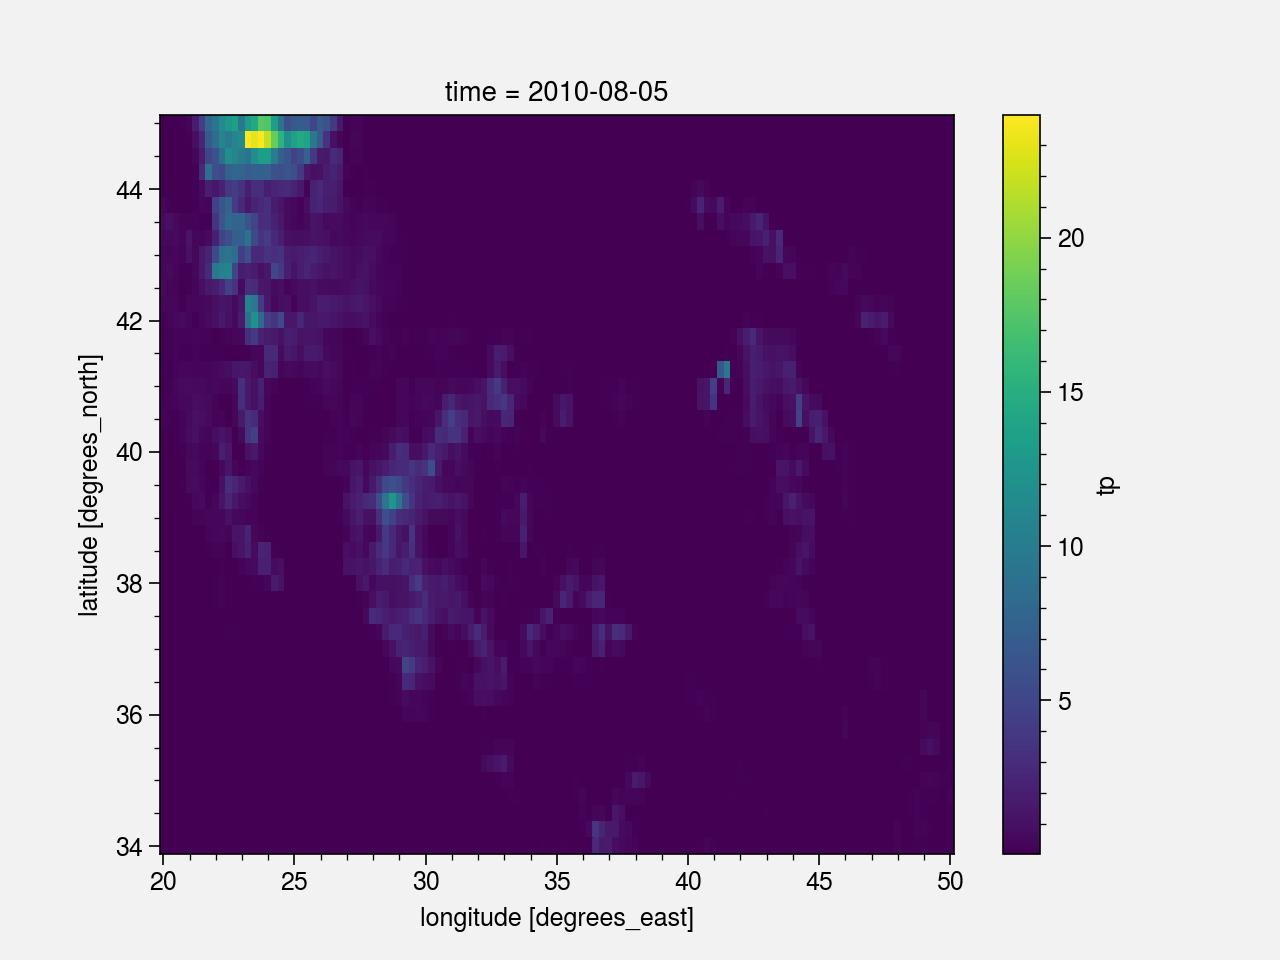

In [13]:
dt_era5.plot()

In [28]:
#let's define colorbar ### COLORBAR FUNCTION IS DERIVED FROM TOMER BURG GITHUB.COM/TOMERBURG ###
def plot_colorbar(mappable=None,location='right',size="3%",pad='1%', sizing=15,fig=None,ax=None,**kwargs):
    """
    Uses the axes_grid toolkit to add a colorbar to the parent axis and rescale its size to match
            that of the parent axis, similarly to Basemap's functionality.

            Parameters:
            ----------------------
            mappable
                The image mappable to which the colorbar applies. If none specified, matplotlib.pyplot.gci() is
                used to retrieve the latest mappable.
            location
                Location in which to place the colorbar ('right','left','top','bottom'). Default is right.
            size
                Size of the colorbar. Default is 3%.
            pad
                Pad of colorbar from axis. Default is 1%.
            ax
                Axes instance to associated the colorbar with. If none provided, or if no
                axis is associated with the instance of Map, then plt.gca() is used.
    """
        
        #check if axis exists
    if ax == None:
        ax = paint_ax(check_proj=True, proj='Mercator')
        
    print(1)
    #Get current mappable if none is specified
    if fig == None:
        fig = plt.gcf()
            
    if mappable is None:
        mappable = plt.gci()
        
        #Create axis to insert colorbar in
    divider = make_axes_locatable(ax)
        
    if location == "left":
        orientation = 'vertical'
        ax_cb = divider.new_horizontal(size, pad, pack_start=True, axes_class=plt.Axes)
        
    elif location == "right":
        orientation = 'vertical'
        ax_cb = divider.new_horizontal(size, pad, pack_start=False, axes_class=plt.Axes)
        
    elif location == "bottom":
        orientation = 'horizontal'
        ax_cb = divider.new_vertical(size, pad, pack_start=True, axes_class=plt.Axes)
        
    elif location == "top":
        orientation = 'horizontal'
        ax_cb = divider.new_vertical(size, pad, pack_start=False, axes_class=plt.Axes)
        
    else:
        raise ValueError('Improper location entered')
        
        #Create colorbar
    fig.add_axes(ax_cb)
    cb = plt.colorbar(mappable, orientation=orientation, cax=ax_cb, **kwargs)
    cb.ax.tick_params(labelsize=sizing)


def Compact_precipitation(data):      
    
    #get lat lon
    lon = data['longitude']
    lat = data['latitude']
    
    # cmap
    import matplotlib
    # Colorbar with NSW Precip colors
    nws_precip_colors = [
        "#ffffff",
        "#04e9e7",  # 0.01 - 0.10 inches
        "#019ff4",  # 0.10 - 0.25 inches
        "#0300f4",  # 0.25 - 0.50 inches
        "#02fd02",  # 0.50 - 0.75 inches
        "#01c501",  # 0.75 - 1.00 inches
        "#008e00",  # 1.00 - 1.50 inches
        "#fdf802",  # 1.50 - 2.00 inches
        "#e5bc00",  # 2.00 - 2.50 inches
        "#fd9500",  # 2.50 - 3.00 inches
        "#fd0000",  # 3.00 - 4.00 inches
        "#d40000",  # 4.00 - 5.00 inches
        "#bc0000",  # 5.00 - 6.00 inches
        "#f800fd",  # 6.00 - 8.00 inches
        "#9854c6",  # 8.00 - 10.00 inches
        "#fdfdfd"   # 10.00+
    ]
    precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

    levels = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250]
    norm = matplotlib.colors.BoundaryNorm(levels, 15)
    
    
    # fig
    cart_proj = cartopy.crs.Mercator()
    fig = plt.figure(figsize=(16,14))
    # Set the GeoAxes to the projection used by WRF
    ax = plt.axes(projection=cart_proj)
    
    # extent
    ax.set_extent([24, 46, 32, 44])
    
    #get cmap 
    ax.add_feature(cartopy.feature.BORDERS.with_scale('10m'), linewidth = 2, color='black', zorder = 3)
    ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m'), linewidth = 2, color='black', zorder = 3)
    
    # plot
    mesh = ax.pcolormesh(lon, lat, data, cmap=precip_colormap,
                norm = norm,
                transform=cartopy.crs.PlateCarree(),
                zorder=2, )
    
    # colorbar
    #plot_colorbar(mappable=mesh, location='bottom', size='2%', pad='2%', ax=ax, sizing=17, drawedges = True, label = )# ticks=np.arange(-40, 28.5, 2) ))
    cbar = plt.colorbar(mesh, shrink=1, pad=0.01, label = 'mm', orientation='horizontal', aspect=90, drawedges = True, ticks=levels)
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(label='mm', size=18, )
    cbar.outline.set_linewidth(1)
    #cbar.dividers(linewidth = 1)
    cbar.minorticks_off()
    cbar.ax.get_children()[4].set_color('black')
    cbar.solids.set_linewidth(2)
    
    # timestamp title
    year_of = str(data['time'].values)[:10]
    ax.set_title("Valid: {} ~ Precipitation (mm/1day)".format(year_of), fontsize=25, loc = 'left', weight='heavy',style='italic',)
    ax.set_title(None, fontsize=12, loc = 'center')
    
    # climaturk title
    title_climaturk = ax.set_title("Climaturk", fontsize=30, loc = 'right', color='white', style='italic',
                                          fontname = 'Constantia')
    title_climaturk.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
            
    
    #plt.close()

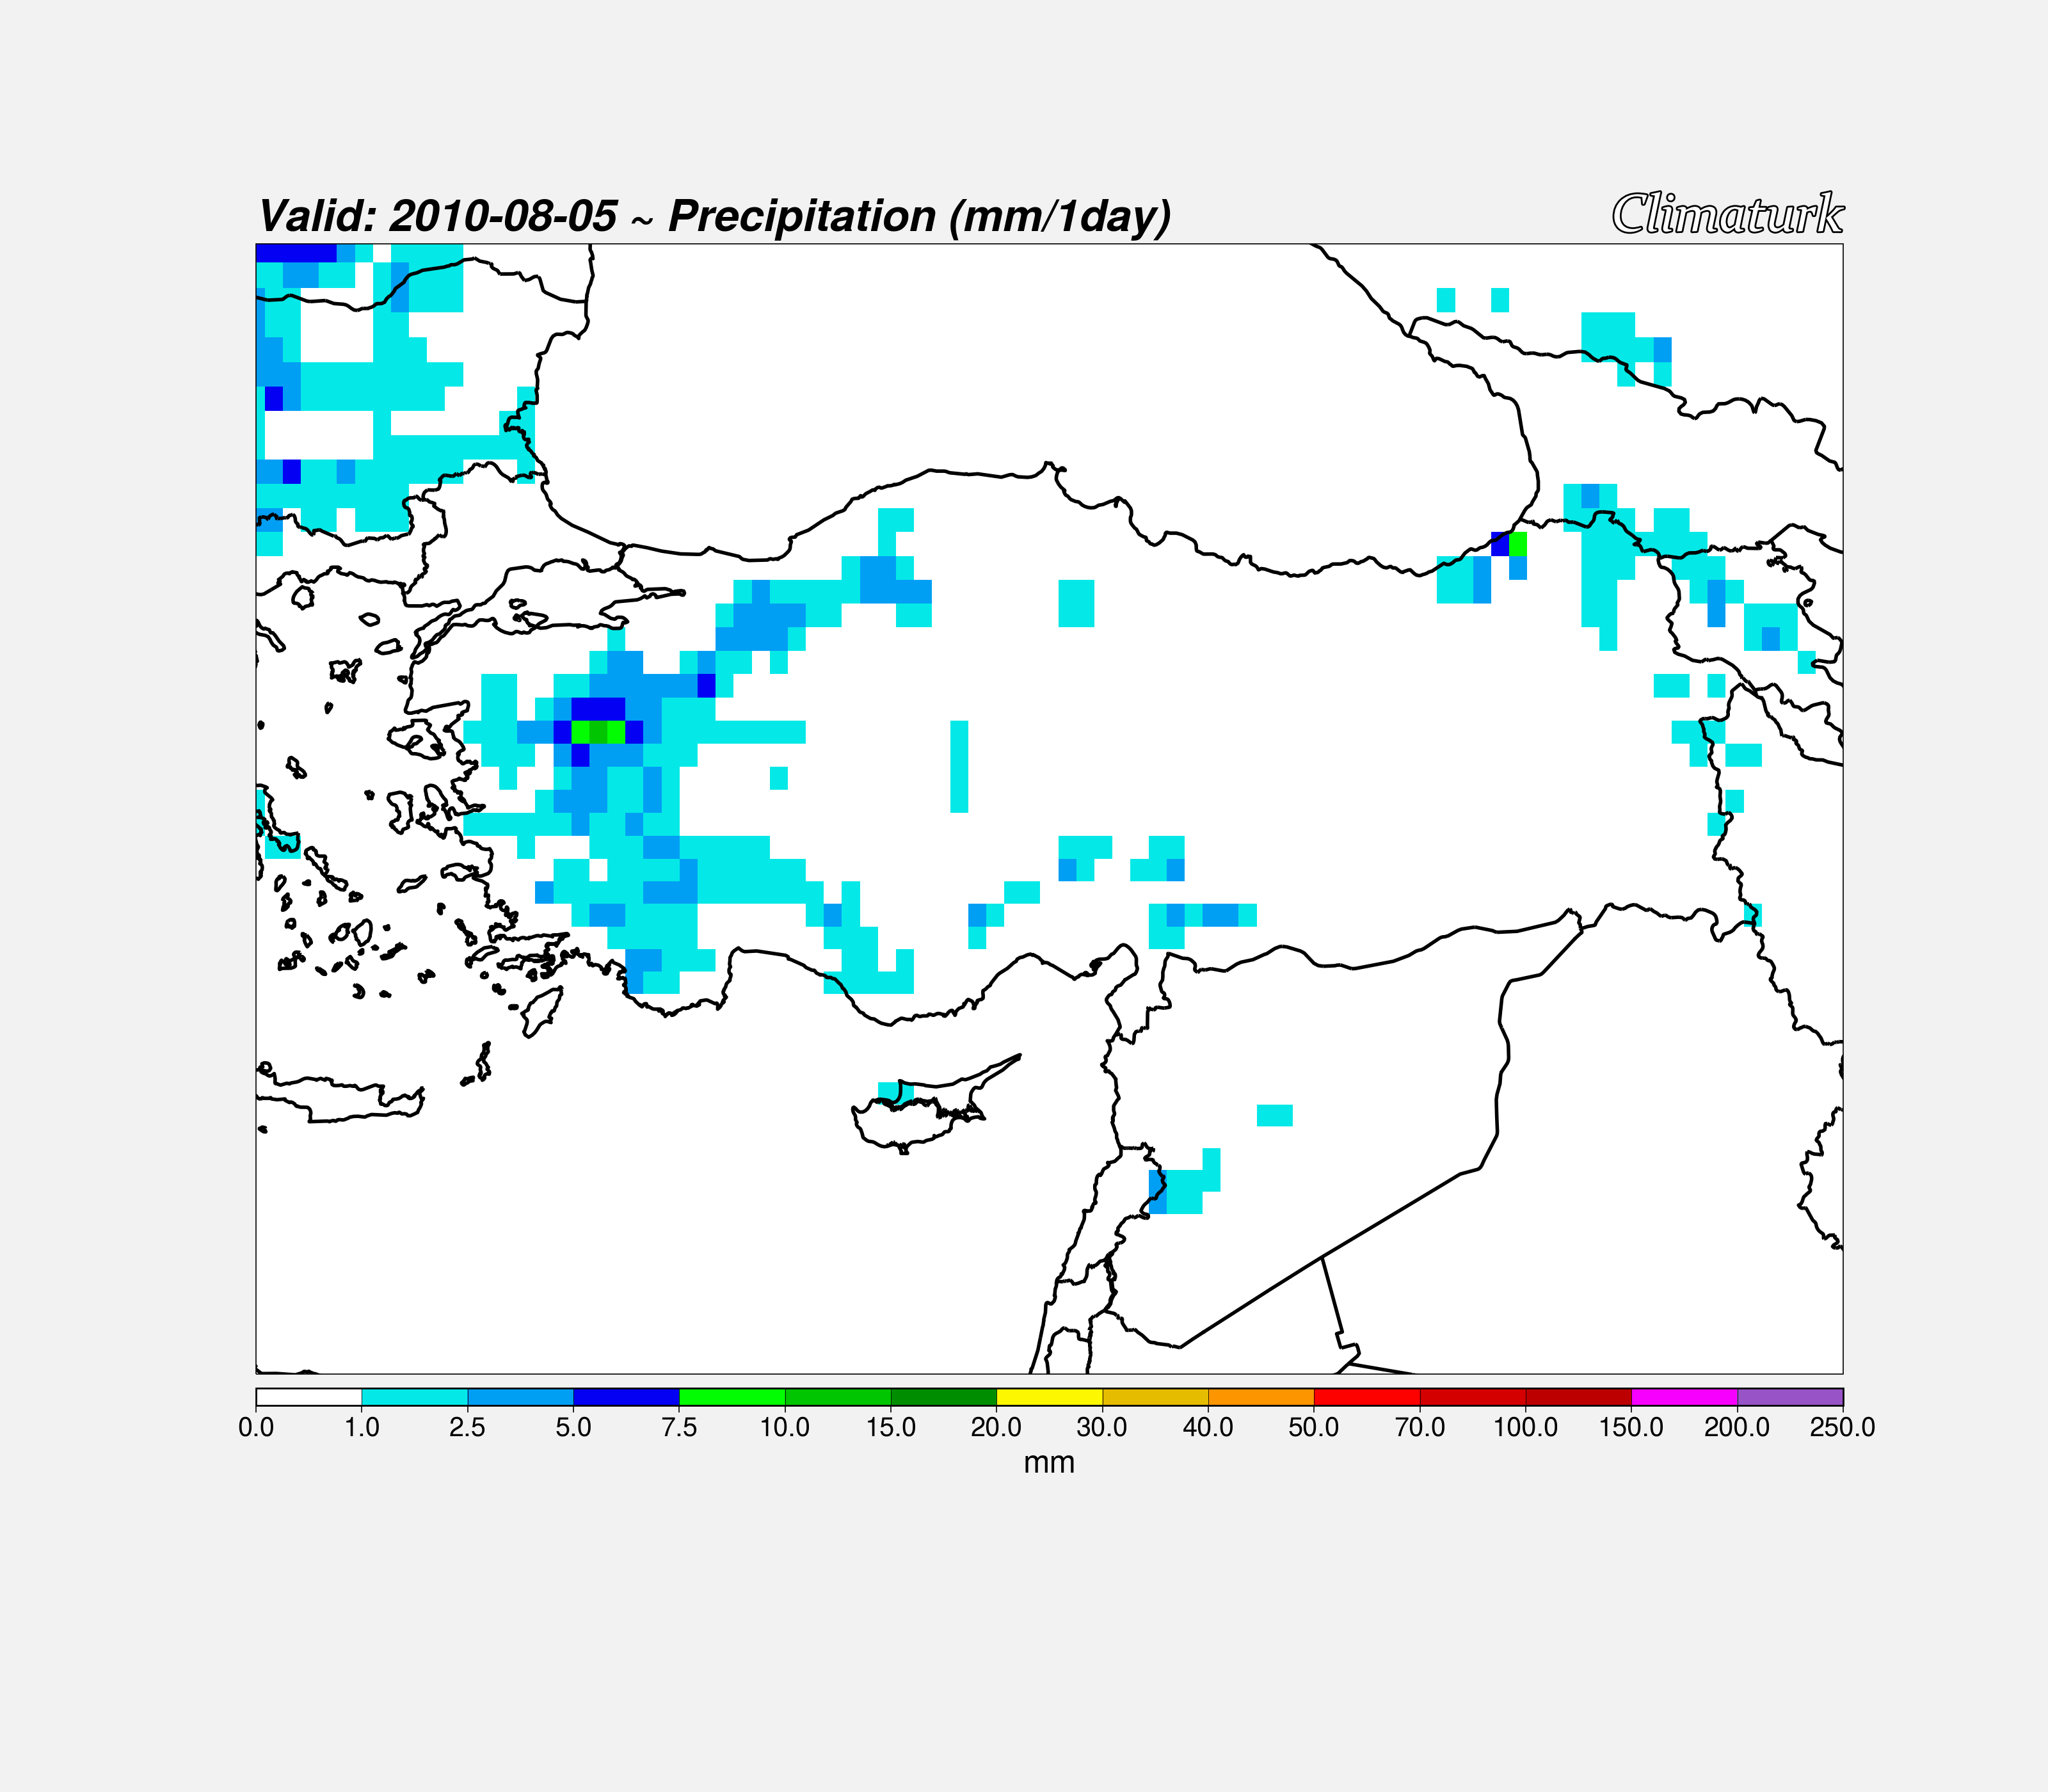

In [29]:
Compact_precipitation(dt_era5)